In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

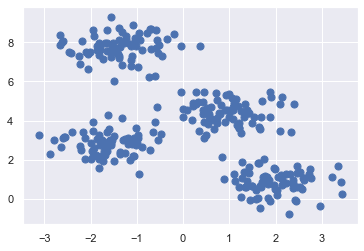

In [2]:
from sklearn.datasets.samples_generator import make_blobs
x,y_true = make_blobs(n_samples=300, centers=4, cluster_std=.60,
                     random_state=0)
plt.scatter(x[:,0],x[:,1], s=50)

In [3]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=4)
Kmeans.fit(x)
y_kmeans = Kmeans.predict(x)

In [4]:
x.shape

(300, 2)

In [5]:
y_kmeans

array([2, 0, 3, 0, 2, 2, 1, 3, 0, 0, 1, 0, 3, 0, 2, 3, 3, 2, 1, 1, 2, 2,
       3, 1, 1, 3, 2, 3, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 1, 2, 3, 1, 3, 3,
       1, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 0, 3, 0, 1, 1, 1,
       0, 2, 0, 1, 3, 1, 0, 1, 1, 0, 1, 3, 2, 0, 2, 3, 2, 2, 0, 3, 2, 3,
       0, 0, 3, 2, 0, 1, 1, 3, 2, 2, 3, 1, 0, 2, 0, 2, 3, 2, 2, 3, 0, 3,
       1, 1, 2, 0, 2, 3, 0, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1,
       1, 2, 0, 1, 1, 0, 3, 0, 0, 1, 3, 1, 3, 1, 0, 3, 0, 0, 0, 3, 0, 3,
       2, 1, 0, 1, 2, 3, 0, 3, 3, 2, 3, 1, 1, 3, 2, 3, 3, 0, 2, 3, 1, 0,
       2, 2, 3, 1, 2, 3, 1, 1, 3, 3, 3, 3, 2, 0, 3, 1, 3, 3, 1, 1, 1, 3,
       1, 0, 3, 1, 2, 1, 3, 0, 1, 0, 3, 0, 3, 1, 3, 3, 0, 1, 1, 2, 2, 3,
       0, 2, 2, 1, 2, 1, 3, 0, 0, 3, 3, 0, 3, 2, 1, 3, 2, 1, 0, 1, 2, 3,
       2, 0, 0, 0, 0, 1, 1, 0, 3, 1, 2, 3, 1, 1, 1, 2, 2, 0, 3, 3, 1, 2,
       0, 1, 3, 0, 3, 2, 2, 1, 1, 3, 2, 2, 2, 3, 0, 0, 2, 2, 3, 2, 2, 2,
       0, 1, 0, 3, 2, 2, 0, 0, 0, 2, 2, 3, 0, 1])

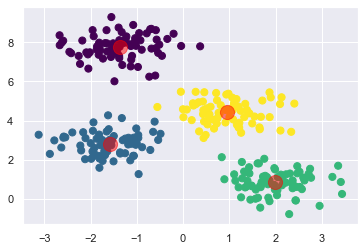

In [6]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(x,n_clusters,rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(x.shape[0])[:n_clusters]
    centers =x[i]
    
    while True:
        labels = pairwise_distances_argmin(x,centers)
        new_centers = np.array([x[labels==i].mean(0)
                               for i in range(n_clusters)])
        if np.all(centers==new_centers):
            break
        centers = new_centers
    
    return centers,labels
centers,labels =find_clusters(x,4)
plt.scatter(x[:,0],x[:,1], c=y_kmeans,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1], c='red',s=200,alpha=.5)

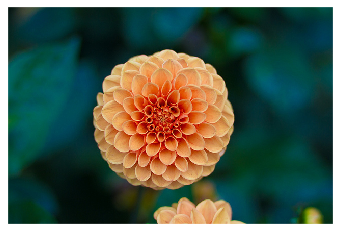

In [7]:
from sklearn.datasets import load_sample_image
china = load_sample_image('flower.jpg')
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(china)

In [8]:
china.shape

(427, 640, 3)

In [9]:
data = china/255.0
data = data.reshape(427*640,3)
data.shape

(273280, 3)

In [10]:
def plot_pixels(data,title,color=None,N=10000):
    if color is None:
        colors = data
    
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R,G,B = data[i].T
    
    fig,ax = plt.subplots(1,2, figsize=(16,6))
    ax[0].scatter(R,G, color=colors, marker='.')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    
    ax[1].scatter(R,B, color=colors, marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    fig.suptitle(title, size=20)

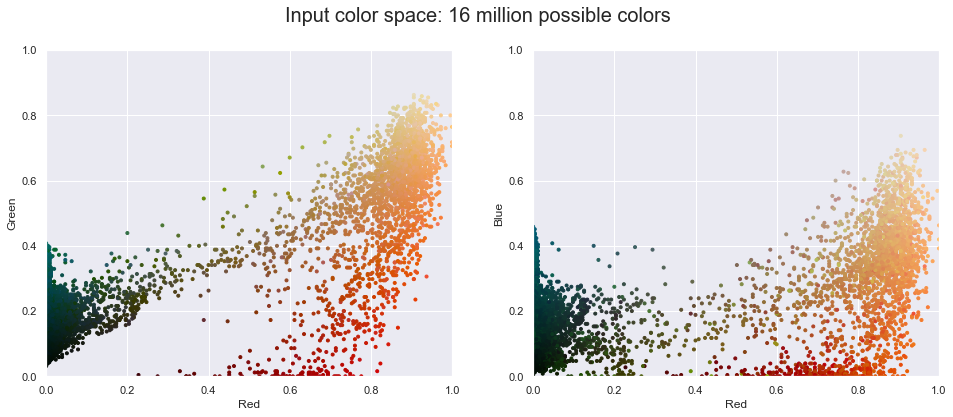

In [11]:
plot_pixels(data,title='Input color space: 16 million possible colors')

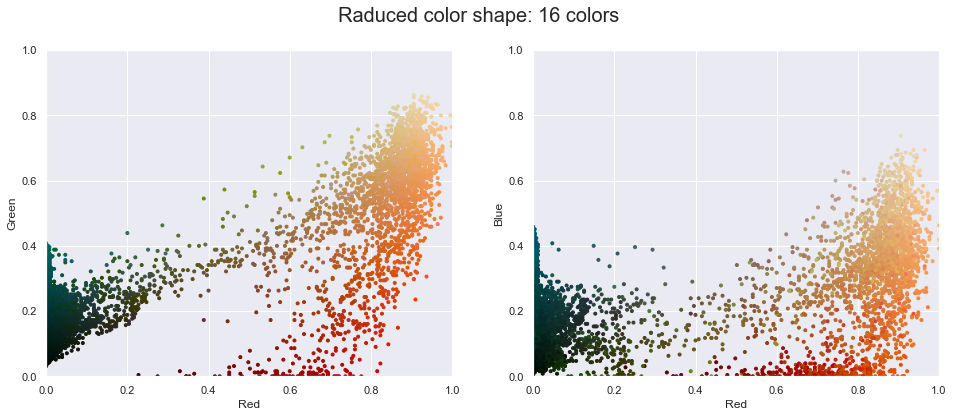

In [12]:
import warnings
warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data,title='Raduced color shape: 16 colors')

Text(0.5, 1.0, '16-color Image')

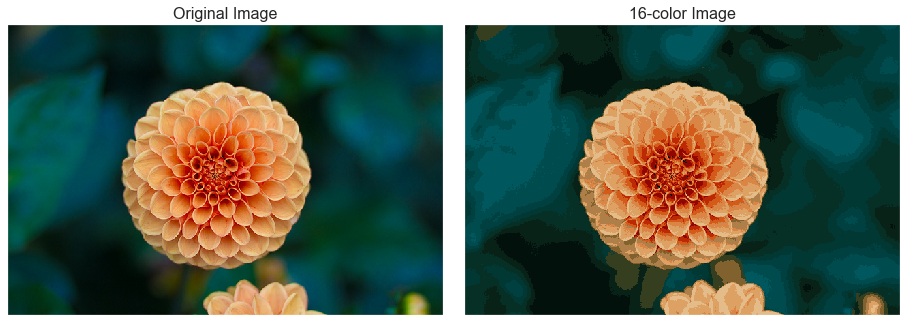

In [13]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1,2, figsize=(16,6),
                      subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=.05)
ax[0].imshow(china)
ax[0].set_title('Original Image',size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image',size=16)

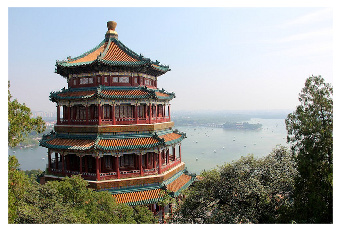

In [14]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(china)

In [15]:
china.shape

(427, 640, 3)

In [16]:
data = china/255.0
data = data.reshape(427*640,3)
data.shape

(273280, 3)

In [17]:
def plot_pixels(data,title,color=None,N=10000):
    if color is None:
        colors = data
    
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R,G,B = data[i].T
    
    fig,ax = plt.subplots(1,2, figsize=(16,6))
    ax[0].scatter(R,G, color=colors, marker='.')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    
    ax[1].scatter(R,B, color=colors, marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    fig.suptitle(title, size=20)

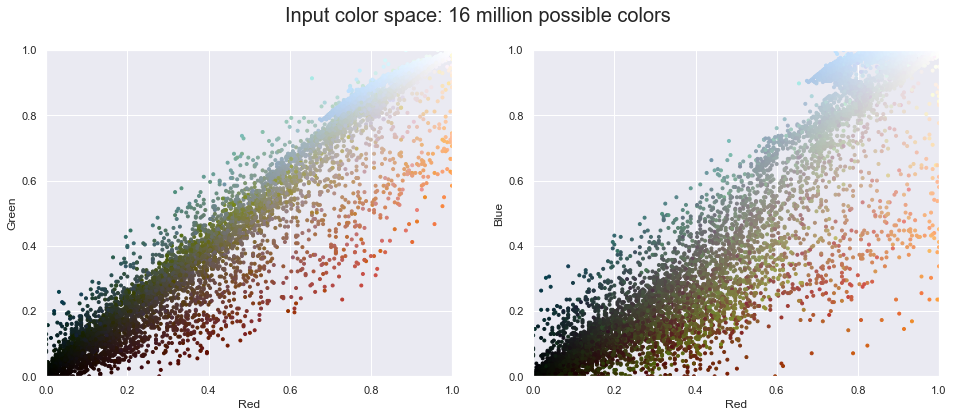

In [18]:
plot_pixels(data,title='Input color space: 16 million possible colors')

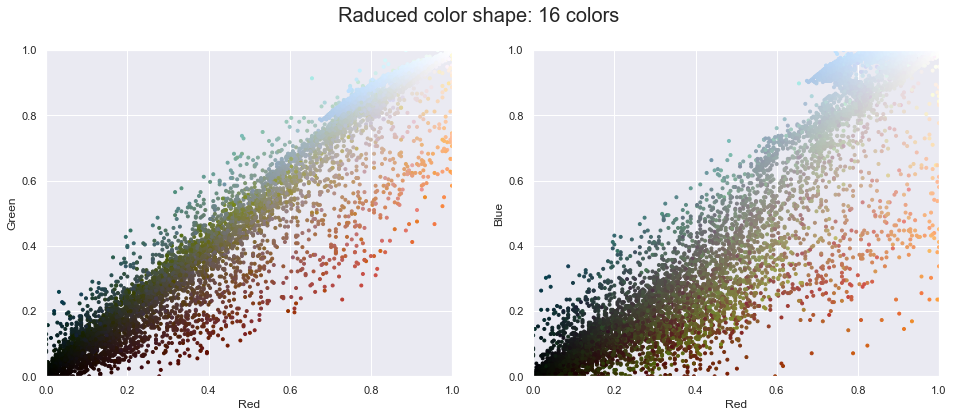

In [19]:
import warnings
warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data,title='Raduced color shape: 16 colors')

Text(0.5, 1.0, '16-color Image')

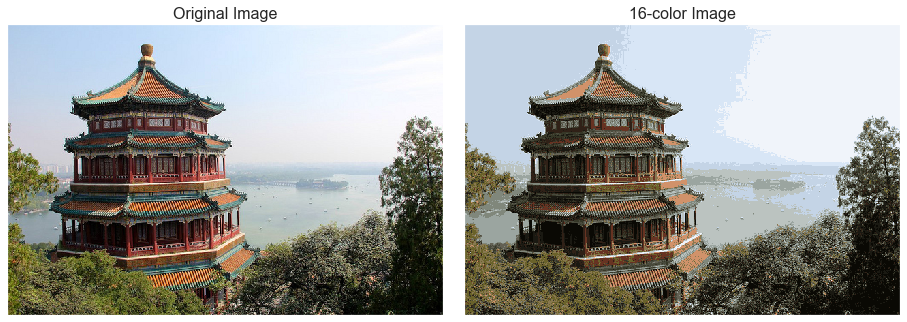

In [20]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1,2, figsize=(16,6),
                      subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=.05)
ax[0].imshow(china)
ax[0].set_title('Original Image',size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image',size=16)